# Data Quality Report

### 1. Dataset Profile

In [1]:
import csv
import pandas as pd
import numpy as np

df = pd.read_csv("group_21_url_1_transcript.csv")

In [2]:
df.head(10)

,Start Time,End Time,Sentence,Translation,Emotion_fine,Emotion_core,Intensity
0,00:00:00,00:00:01,"Hey, guys. We good?","Hey, guys. We good?",inquiry,neutral,neutral
1,00:00:01,00:00:02,"Yes, Chef.","Yes, Chef.",respect,neutral,neutral
2,00:00:02,00:00:03,Nice to see you again.,Nice to see you again.,warmth,happiness,mild
3,00:00:03,00:00:04,Here we go.,Here we go.,readiness,neutral,neutral
4,00:00:04,00:00:05,Welcome backstage.,Welcome backstage.,hospitality,happiness,mild
5,00:00:05,00:00:06,"Now, this is where the MasterChef magic happens.","Now, this is where the MasterChef magic happens.",excitement,happiness,moderate
6,00:00:06,00:00:07,Right here.,Right here.,emphasis,neutral,neutral
7,00:00:07,00:00:08,"Brady, let's take the one on the left.","Brady, let's take the one on the left.",instruction,neutral,neutral
8,00:00:08,00:00:09,Make sure there's no creases in there.,Make sure there's no creases in there.,attention,neutral,neutral
9,00:00:09,00:00:10,Please.,Please.,politeness,neutral,neutral


### Dataset size

In [3]:
# Dataset size
df.shape

(1095, 7)

### Missing values

In [4]:
# Missing values
df.isna().sum()

Start Time      0
End Time        0
Sentence        0
Translation     0
Emotion_fine    0
Emotion_core    0
Intensity       0
dtype: int64

### Duplicates

In [5]:
# Duplicates
int(df.duplicated().sum())

0

In [6]:
df_no_time = df.drop(columns=['Start Time', 'End Time'])
int(df_no_time.duplicated().sum())

100

No duplicated columns, but there are sentences that are the time with different sentiment. There are no errors in the data as each of these have the same time stamp. When time stamps are removed there are 100 sentences that are the same, we will investigate similar sentences that have different sentiment in 4. Data Quality.

### Average sentence length

In [7]:
# Average sentence length
sentence_lengths = []

for sentence in df['Sentence']:
    words = str(sentence).split()
    sentence_lengths.append(len(words))

print(f"Average sentence size: {np.mean(sentence_lengths)}")

Average sentence size: 5.880365296803653


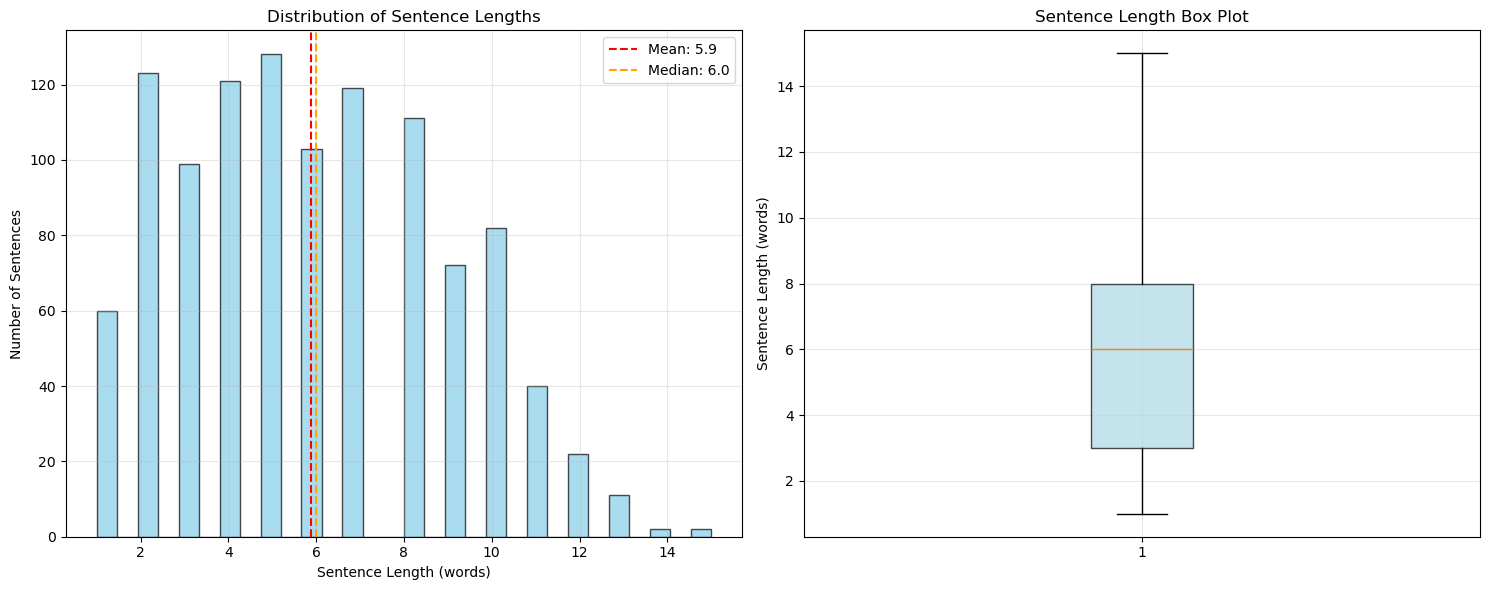

In [8]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with automatic bins
ax1.hist(sentence_lengths, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Sentence Length (words)')
ax1.set_ylabel('Number of Sentences')
ax1.set_title('Distribution of Sentence Lengths')
ax1.grid(True, alpha=0.3)

# Vertical lines for mean and median
ax1.axvline(np.mean(sentence_lengths), color='red', linestyle='--', 
            label=f'Mean: {np.mean(sentence_lengths):.1f}')
ax1.axvline(np.median(sentence_lengths), color='orange', linestyle='--', 
            label=f'Median: {np.median(sentence_lengths):.1f}')
ax1.legend()

# Box plot for another perspective
ax2.boxplot(sentence_lengths, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
ax2.set_ylabel('Sentence Length (words)')
ax2.set_title('Sentence Length Box Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Vocabulary size

In [9]:
# Vocabulary size
unique_words_list = []

for sentence in df['Sentence']:
    words = str(sentence).split()

    for word in words:
        clean_word = word.lower().strip('.,?;"!()[]:-')
        
        if clean_word not in unique_words_list:
            unique_words_list.append(clean_word)

vocabulary_size = len(unique_words_list)
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 1188


The sentence length distribution is balanced, with a tail to the right. Sentences in this data is relatively short leading to difficult in contriving complex emotions. Additionally, the vocabulary size of 1188 for a 40-minute episode is very small. The vocabulary used is simple and likely contains very focused and nuanced content. 

In order to preform well on this text set, it will be important to have strong training in this particular domain (cooking, british).

### Token distribution

In [10]:
# Token distribution
import spacy

nlp = spacy.load("en_core_web_sm")

token_counts = {}
pos_counts = {}

for sentence in df["Sentence"]:
    doc = nlp(str(sentence))

    for token in doc:
        token_text = token.text.lower()

        if token_text in token_counts:
            token_counts[token_text] += 1
        else:
            token_counts[token_text] = 1

        # POS tag counting (new addition)
        pos_tag = token.pos_
        if pos_tag in pos_counts:
            pos_counts[pos_tag] += 1
        else:
            pos_counts[pos_tag] = 1

token_df = pd.DataFrame(list(token_counts.items()), columns=['token', 'count'])

# Sort in descending order
top_tokens_df = token_df.sort_values(by='count', ascending=False).head(10)
top_tokens_df = top_tokens_df.reset_index(drop=True)

pos_df = pd.DataFrame(list(pos_counts.items()), columns=['pos_tag', 'count'])
pos_df_sorted = pos_df.sort_values(by='count', ascending=False)
pos_df_sorted = pos_df_sorted.reset_index(drop=True)

In [11]:
top_tokens_df

,token,count
0,.,787
1,",",515
2,you,253
3,i,238
4,the,221
5,to,186
6,a,182
7,it,163
8,'s,156
9,and,131


### Extra data POS tags

In [12]:
pos_df_sorted

,pos_tag,count
0,PUNCT,1474
1,PRON,1132
2,NOUN,1049
3,VERB,1001
4,AUX,556
5,DET,539
6,ADP,511
7,ADJ,489
8,ADV,486
9,PROPN,256


There is a lot of punctuation in the vocabulary. This is largely unimportant for sentiment analysis. It is important that the focus of the model is the words used in context. In our preparation for training we should not remove punctuation. The sentences are short and the emotions are exclaimed quickly through things like puncuation.

## **2. Speaker/show distributions to detect dominance**

There is no column for speaker. The show has a lot of different speakers and there is no specific dominance. This cannot be analyzed, it is more important to train data that is also in this TV show format. There are lots of characters and names that the model must be able to identify to predict sentiment.

Refinement: There are several difference characters with very strong personalities. For example, Gordan Ramsey is often disgusted or mad. On the other hand Aaron is very angry. To classify these emotions, the speaker impacts the sentiment as Aaron will be more likely to be mad. Without the speaker column this is impossible to adjust for, however, through using TV show data that contains strong character personalities, our model will preform better. 

## Emotion Distribution and Coverage

In [13]:
emotion_percentages = df['Emotion_core'].value_counts(normalize=True) * 100
emotion_percentages

Emotion_core
happiness    45.388128
neutral      26.940639
surprise      9.589041
sadness       7.945205
fear          6.392694
anger         2.100457
disgust       1.643836
Name: proportion, dtype: float64

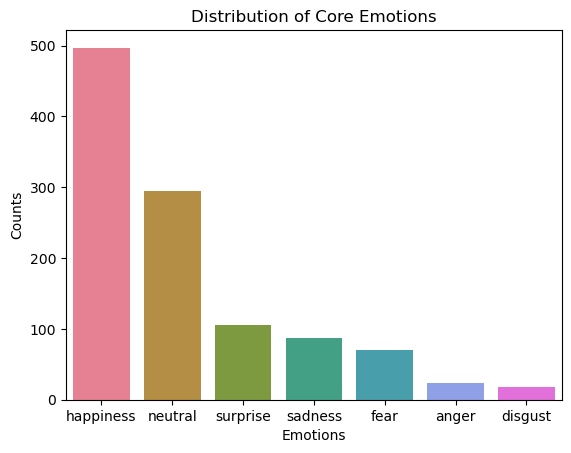

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Emotion Distribution and Coverage (core)
emotion_counts = df['Emotion_core'].value_counts()
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, hue=emotion_counts.index, palette='husl')
plt.title('Distribution of Core Emotions')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.show()


The core emotions are very imbalanced. Nearly 50% of the sentiment belongs to happy, 25% to neutral, and the last 25% split among the other five emotions. 

This imbalance shows that by creating a model that is very accurate at predicting happiness and neutral, the results on this test set will increase dramatically. In accessing our models it is very important that it preforms well on all emotions. We might have to consider another test set while building our model to increase generalizability, and then finally testing on this set.

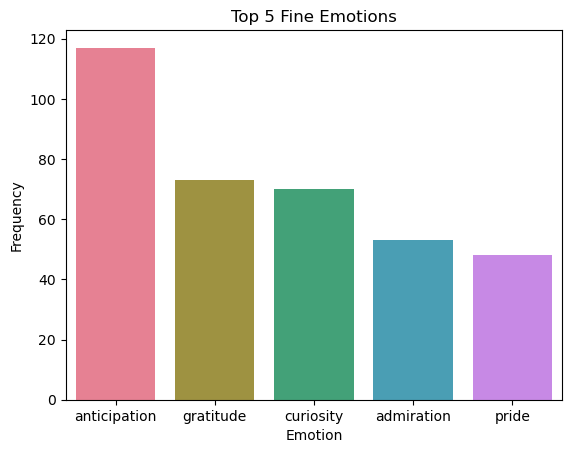

In [15]:
# Emotion Distribution and Coverage (fine)
# Top 5 fine included
top_fine = df['Emotion_fine'].value_counts().head(5)
sns.barplot(x=top_fine.index, y=top_fine.values, hue=top_fine.index, palette='husl')
plt.title("Top 5 Fine Emotions")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.show()


It is unimportant to analyze the fine emotions because this is not the focus of our project. There are a wide variety of emotions shown in the data. Further drill down into anticipation and overlap of emotions is done in imbalance and system gaps.

## Frequency of each annotated emotion

In [16]:
# Frequency of each annotated emotion (core)
core_counts = df['Emotion_core'].value_counts()

print("Core emotion distribution:")
print(core_counts)

Core emotion distribution:
Emotion_core
happiness    497
neutral      295
surprise     105
sadness       87
fear          70
anger         23
disgust       18
Name: count, dtype: int64


In [17]:
# Frequency of each annotated emotion (fine)
fine_counts = df['Emotion_fine'].value_counts()
fine_counts_df = fine_counts.reset_index()
fine_counts_df.columns = ['Emotion_fine', 'Count']

We put the emotions in a dataframe for readability since there are 175 different fine tuned emotions

In [18]:
fine_counts_df

,Emotion_fine,Count
0,anticipation,117
1,gratitude,73
2,curiosity,70
3,admiration,53
4,pride,48
...,...,...
170,gratification,1
171,difficulty,1
172,triumph,1
173,recap,1


### Identify whether important emotions are underrepresented

In [19]:
print(core_counts)

Emotion_core
happiness    497
neutral      295
surprise     105
sadness       87
fear          70
anger         23
disgust       18
Name: count, dtype: int64


### Underrepresented core emotions

The distribution of core emotions shows that:

- **Highly represented:** 
    - happiness (497)
    - neutral (295)
- **Moderately represented:** 
    - surprise (105)
    - sadness (87)
    - fear (70)
- **Underrepresented:** 
    - anger (23)
    - disgust (18)

The model may struggle to correctly predict **anger and disgust**, as there is a very small amount of examples for the model to learn from.

In [20]:
underrepresented_fine = fine_counts_df[fine_counts_df['Count'] < 5]

In [21]:
underrepresented_fine

,Emotion_fine,Count
48,instruction,4
49,preference,4
50,reassurance,4
51,request,4
52,approval,4
...,...,...
170,gratification,1
171,difficulty,1
172,triumph,1
173,recap,1


### Underrepresented fine emotions

Out of 175 fine-grained emotions, 127 occur fewer than 5 times, however this seems normal since this is fine emotions instead of the core emotions, so there are naturally going to be a lot of fine emotions that are rare and don't occur very frequently at all.

These underrepresented emotions are very rare and may not provide the model with 
enough examples to learn reliably. 

## **3. Domain Characteristics**

### Informal language

The language is quite informal at times, especially with the use of many contraction words such as:
"don't", "doesn't", "can't", "i'm", "you're", "gonna", "y'all"

The code below to show that there is a decent amount of informal language in the transcript. We should train our model on unprofessional data where it can better predict based on informal sentences.

In [22]:
informal_words = ["don't", "doesn't", "can't", "i'm", "you're", "gonna", "y'all"]

informal_counts = {}

for word in informal_words:
    count = 0
    for sentence in df['Sentence']:
        sentence_lower = str(sentence).lower()
        if word in sentence_lower:
            count += 1
    informal_counts[word] = count

print("Informal language counts:")
for word, count in informal_counts.items():
    print(f"{word}: {count}")

Informal language counts:
don't: 12
doesn't: 3
can't: 4
i'm: 44
you're: 15
gonna: 19
y'all: 1


### Hesitations
Words like "um" and "uh" occur in some lines, indicating natural speech pauses. However there isn't a lot but it is present.

In [23]:
fillers = ["um", "uh", "like", "you know", "erm", "uhh"]

filler_counts = {}

for filler in fillers:
    count = 0
    for sentence in df['Sentence']:
        sentence_lower = str(sentence).lower()
        if filler in sentence_lower:
            count += 1
    filler_counts[filler] = count

print("Filler / hesitation counts:")
for filler, count in filler_counts.items():
    print(f"{filler}: {count}")

Filler / hesitation counts:
um: 10
uh: 1
like: 20
you know: 17
erm: 2
uhh: 0


### Interruptions

There are several interruptions and cut off. This relates to the format of TV shows. We need to make sure we train on other TV show data, so our model can better understand and predict based on these formats.

In [24]:
interruptions_symbols = ["--", "…", "...", "-"]

interrupt_counts = {}

for symbol in interruptions_symbols:
    count = 0
    for sentence in df['Sentence']:
        if symbol in str(sentence):
            count += 1
    interrupt_counts[symbol] = count

print("Interruptions / cut-off counts:")
for symbol, count in interrupt_counts.items():
    print(f"{symbol}: {count}")


Interruptions / cut-off counts:
--: 0
…: 0
...: 20
-: 39


### Slang

There doesn't seem to be specific slang from a particular region. The show contains several chefs from different locations, it is not valuable to focus on training on specific slang.

In [25]:
slang_words = ['bloody', 'blimey', 'crikey', 'bollocks', 'rubbish', 'brilliant', 'proper', 
    'mental', 'mad', 'daft', 'muppet', 'numpty', 'plonker', 'mug', 'pillock',
    'knackered', 'chuffed', 'gutted', 'sorted', 'right', 'innit', 'yeah',
    'nah', 'mate', 'lad', 'lass', 'geezer', 'bloke']

slang_counts = {}

for word in slang_words:
    count = 0
    for sentence in df['Sentence']:
        sentence_lower = str(sentence).lower()
        if word in sentence_lower:
            count += 1
    slang_counts[word] = count

print("Slang counts:")
for word, count in slang_counts.items():
    print(f"{word}: {count}")


Slang counts:
bloody: 0
blimey: 0
crikey: 0
bollocks: 0
rubbish: 0
brilliant: 0
proper: 0
mental: 0
mad: 10
daft: 0
muppet: 0
numpty: 0
plonker: 0
mug: 0
pillock: 0
knackered: 0
chuffed: 0
gutted: 0
sorted: 0
right: 31
innit: 0
yeah: 12
nah: 0
mate: 2
lad: 11
lass: 1
geezer: 0
bloke: 0


### Regional variations

There are a lot of domain specific words. These cooking terms include cooking techniques, ingredients, and equipment. We need to make sure that our models train on a specific cooking domain dataset.

In [26]:
regional_words = ["chef", "judge", "dish", "plate", "cook", "kitchen"]

regional_counts = {}

for word in regional_words:
    count = 0
    for sentence in df['Sentence']:
        sentence_lower = str(sentence).lower()
        if word in sentence_lower:
            count += 1
    regional_counts[word] = count

print("Regional variation counts:")
for word, count in regional_counts.items():
    print(f"{word}: {count}")


Regional variation counts:
chef: 70
judge: 4
dish: 35
plate: 9
cook: 28
kitchen: 14


### Translation / Transcription Artifacts

We inspected the 'Translation' column to identify possible translation artifacts. 
Since our dataset was already in English and the translation column is identical 
to the original sentences, no translation artifacts were found.

In [27]:
different_rows = []

for i in range(len(df['Sentence'])):
    original = str(df['Sentence'][i])
    translation = str(df['Translation'][i])
    
    if original != translation:
        different_rows.append((i, original, translation))

print("Number of lines that differ:", len(different_rows))

Number of lines that differ: 0


In [28]:
def find_repeated_words(text):
    """Find repeated consecutive words like 'the the' or 'it it'"""
    words = str(text).lower().split()
    repeated = []
    for i in range(len(words)-1):
        if words[i] == words[i+1] and len(words[i]) > 2:
            repeated.append(f"{words[i]} {words[i+1]}")
    return repeated

repeated_artifacts = []
for idx, sentence in df['Sentence'].items():
    repeats = find_repeated_words(sentence)
    if repeats:
        repeated_artifacts.append((idx, sentence))


In [29]:
repeated_artifacts

[(511, "Hey, hey, hey, let's bring it down."),
 (682, 'Go, go, go!'),
 (1049, "it's a very, very, very courageous move.")]

There are some repeated words but they are not due to transcription errors. These are natural repititions that sentiment can be derived from

## **4. Data Quality Checks**

#### Mislabeled emotions

In [30]:
sentence_top_10 = df['Sentence'].value_counts().head(10)
print(sentence_top_10)

Sentence
Thank you.                             39
It's not your average Caesar.           7
Yes, Chef.                              5
Let's go.                               5
Whoo!                                   4
Yes, chef.                              4
I think it's a little over the top.     4
Oh!                                     4
♪♪♪♪                                    4
This apron is going to...               3
Name: count, dtype: int64


In [31]:
duplicates_analysis = []

# Find sentences with different emotion labels
for sentence in df['Sentence'].dropna().unique():

    subset = df[df['Sentence'] == sentence]

    # Get unique core and fine emotions
    unique_core = list(subset['Emotion_core'].unique())
    unique_fine = list(subset['Emotion_fine'].unique())

    sentence_count = len(subset)

    # Store the information in a dictionary
    duplicates_analysis.append({
        'Sentence': sentence,
        'Emotion_core': unique_core,
        'Emotion_fine': unique_fine,
        'sentence_count': sentence_count
    })

duplicates_analysis = pd.DataFrame(duplicates_analysis)

inconsistent_list = []

# Loop through each row in duplicates_analysis
for i in range(len(duplicates_analysis)):
    row = duplicates_analysis.iloc[i]
    
    if row['sentence_count'] > 1:
        if len(row['Emotion_core']) > 1:
            inconsistent_list.append(row)

inconsistent = pd.DataFrame(inconsistent_list)

In [32]:
inconsistent

,Sentence,Emotion_core,Emotion_fine,sentence_count
3,Here we go.,"[neutral, surprise]","[readiness, anticipation]",2
145,Let's go.,"[happiness, neutral]","[readiness, motivation]",5
283,I didn't come here to not get an apron.,"[anger, happiness]","[determination, resolve]",2
314,Yes.,"[neutral, happiness]","[agreement, assurance]",2
594,Julia's cake is not out of the oven yet.,"[fear, neutral]","[concern, expectation]",2
596,How do you fast track a cake?,"[anger, neutral]","[frustration, curiosity]",2


I picked anger, happiness to use as a specific example because it has opposite emotional sentiment (happiness to anger).

In [33]:
first_occurance = df.iloc[308:313]
second_occurance = df.iloc[320:325]

In [34]:
first_occurance

,Start Time,End Time,Sentence,Translation,Emotion_fine,Emotion_core,Intensity
308,00:11:14.105986,00:11:16.105986,I've spent too much time on this dough.,I've spent too much time on this dough.,frustration,anger,moderate
309,00:11:16.105986,00:11:19.105986,"But it's dry, and I'm in full panic mode.","But it's dry, and I'm in full panic mode.",panic,fear,intense
310,00:11:19.105986,00:11:21.105986,But this is the most important component on my...,But this is the most important component on my...,priority,neutral,moderate
311,00:11:21.105986,00:11:24.105986,I didn't come here to not get an apron.,I didn't come here to not get an apron.,determination,anger,moderate
312,00:11:24.105986,00:11:26.105986,"So we've got 16 minutes to go,","So we've got 16 minutes to go,",anticipation,surprise,mild


In [35]:
second_occurance

,Start Time,End Time,Sentence,Translation,Emotion_fine,Emotion_core,Intensity
320,00:11:47.105986,00:11:49.105986,He might be in a bit of trouble.,He might be in a bit of trouble.,concern,fear,mild
321,00:11:49.105986,00:11:51.105986,So I'm having trouble with the pasta dough rig...,So I'm having trouble with the pasta dough rig...,frustration,sadness,moderate
322,00:11:51.105986,00:11:53.105986,But this is the most important component on my...,But this is the most important component on my...,determination,neutral,mild
323,00:11:53.105986,00:11:55.105986,I didn't come here to not get an apron.,I didn't come here to not get an apron.,resolve,happiness,moderate
324,00:11:55.105986,00:11:58.105986,"I got to just push, and I can do it.","I got to just push, and I can do it.",motivation,happiness,moderate


Very similar contexts, however very different emotion prediction. This was an example of repeated content after the commercial break with different cuts. These slight variations do not elicit a change from determination, anger to resolve, happiness. This example shows that there are inconsistencies in the data. There are many instances of sentences that occur multiple times with different emotions. It is most important that these instances with complete switches from anger to happiness, or sadness to happiness should be investigated.

Additionally, if there are ambiguities in processing sentences that are the same to opposite emotions, it is very likely that there are many more instances of mislabeled data. How would I go about correcting this data to make sure there are no mislabeled data. Is it more likely that the model mislabeled when the intensity is lower, similar to a confidence score. Additionally, the model might not know what an apron is. This would cause the model to guess and to label it differently from the first occurance to the second.

### Misspellings

In [36]:
import nltk
from nltk.corpus import words

# nltk.download('words') needed to run if not downloaded
english_words = set(words.words())

# Build vocabulary from your dataset using value_counts()
word_freq = {}

# Collecting all words
for sentence in df["Sentence"].dropna():
    for word in sentence.split():

        word_lower = word.lower()
        clean_word = word_lower.strip('.,?;"!()[]')

        if clean_word in word_freq:
            word_freq[clean_word] += 1
        else:
            word_freq[clean_word] = 1

vocabulary = set(word_freq.keys())

# Find words not in dictionary
not_in_dict = vocabulary - english_words

print(f"Words not in dictionary: {len(not_in_dict)}")
print("First 20:")
print(list(not_in_dict)[:20])

Words not in dictionary: 331
First 20:
["here's", 'burger', 'runner-up', 'ramsay', "we've", 'warrants', 'killed', 'fond', "can't", 'christian', 'back-to-win', '♪♪♪♪', 'appetizing', "i'm", 'jennifer', 'shanika', 'served', "you're", 'cooks', 'manipulated']


In [37]:
# Added alpha to remove words with punctuation
not_in_dict_with_freq = [(word, word_freq[word]) for word in not_in_dict if word.isalpha()]
not_in_dict_with_freq.sort(key=lambda x: x[1], reverse=True)

print(f"Amount of words after adding isalpha() {len(not_in_dict_with_freq)}")
print(f"\nTop 20 most frequent words not in dictionary:")
for word, count in not_in_dict_with_freq[:20]:
    print(f"{word}: {count}")

Amount of words after adding isalpha() 224

Top 20 most frequent words not in dictionary:
masterchef: 41
minutes: 24
gonna: 19
guys: 12
has: 12
years: 11
christian: 10
emily: 10
pasta: 10
lindsay: 8
arancini: 8
looks: 8
cooked: 8
shanika: 7
caesar: 7
derek: 7
remaining: 6
adrian: 6
amanda: 6
cooks: 5


There are none, or very little misspelled words. These words that are not in NLTK dictionary are names, contractions, words containing ['s] or [-] or domain specific language such as "apron" or "arancini". It is important that we train model on custom embeddings to understand the cooking specific vocabulary. There is a lot of informal and domain specific language used in this data.

In [38]:
print("is 'has' in dictionary?", 'has' in english_words)
print("is 'looks' in dictionary?", 'looks' in english_words)
print("is 'years' in dictionary?", 'years' in english_words)

is 'has' in dictionary? False
is 'looks' in dictionary? False
is 'years' in dictionary? False


These words should be in the NLTK dictionary.

### Encoding errors

In [39]:
df['Emotion_core'].value_counts()

Emotion_core
happiness    497
neutral      295
surprise     105
sadness       87
fear          70
anger         23
disgust       18
Name: count, dtype: int64

There are no encoding errors. The main usable statistic for our sentiment analysis are these core emotions. There are only the core emotions in this category. While the data may be incorrectly labeled and be imbalanced, there are no errors when it comes to encoding. This is the most important 

In [40]:
# Simple encoding error check (just looking for the bad patterns)
import pandas as pd

problem_sentences = []

def simple_encoding_check(df, column='Sentence'):
    bad_patterns = ['Ã', 'â€', 'â„', 'Â']
    
    for idx, sentence in df[column].items():
        sentence_str = str(sentence)
        
        # Check if any bad patterns exist in this sentence
        if any(bad_char in sentence_str for bad_char in bad_patterns):
            problem_sentences.append((idx, sentence_str))

problem_count = len(problem_sentences)
print(problem_count)

0


This additional code is used to detect if there is specific coding errors such as garbled characters in the sentences. There are no encoding errors

### Imbalances or systematic gaps

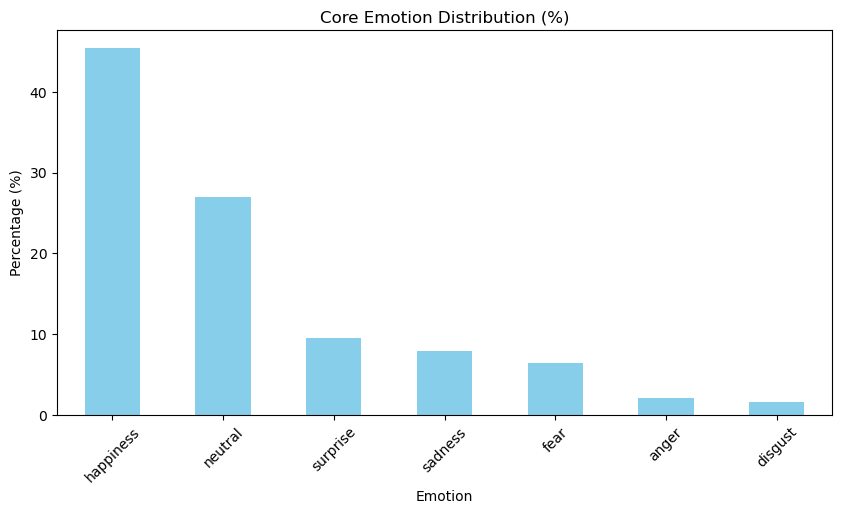

In [41]:
import matplotlib.pyplot as plt

core_counts = df['Emotion_core'].value_counts()

# Convert to percentages
core_percent = (core_counts / core_counts.sum()) * 100

plt.figure(figsize=(10,5))

core_percent.plot(kind='bar', color='skyblue')
plt.title("Core Emotion Distribution (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.show()


The bar chart above shows us the percentages of each core emotion. There is a clear imbalance since happiness dominates while emotions like anger and disgust are underrepresented like we talked about earlier. This means if a model trained with this data, it would probably struggle with recognizing emotions like anger and disgust since there is little data on those. In terms of fine grained emotions, many categories have little to no entries, since most are very empty like mentioned above, however with a very wide range of fine grained emotions it was expected to have many emotions with very low values.

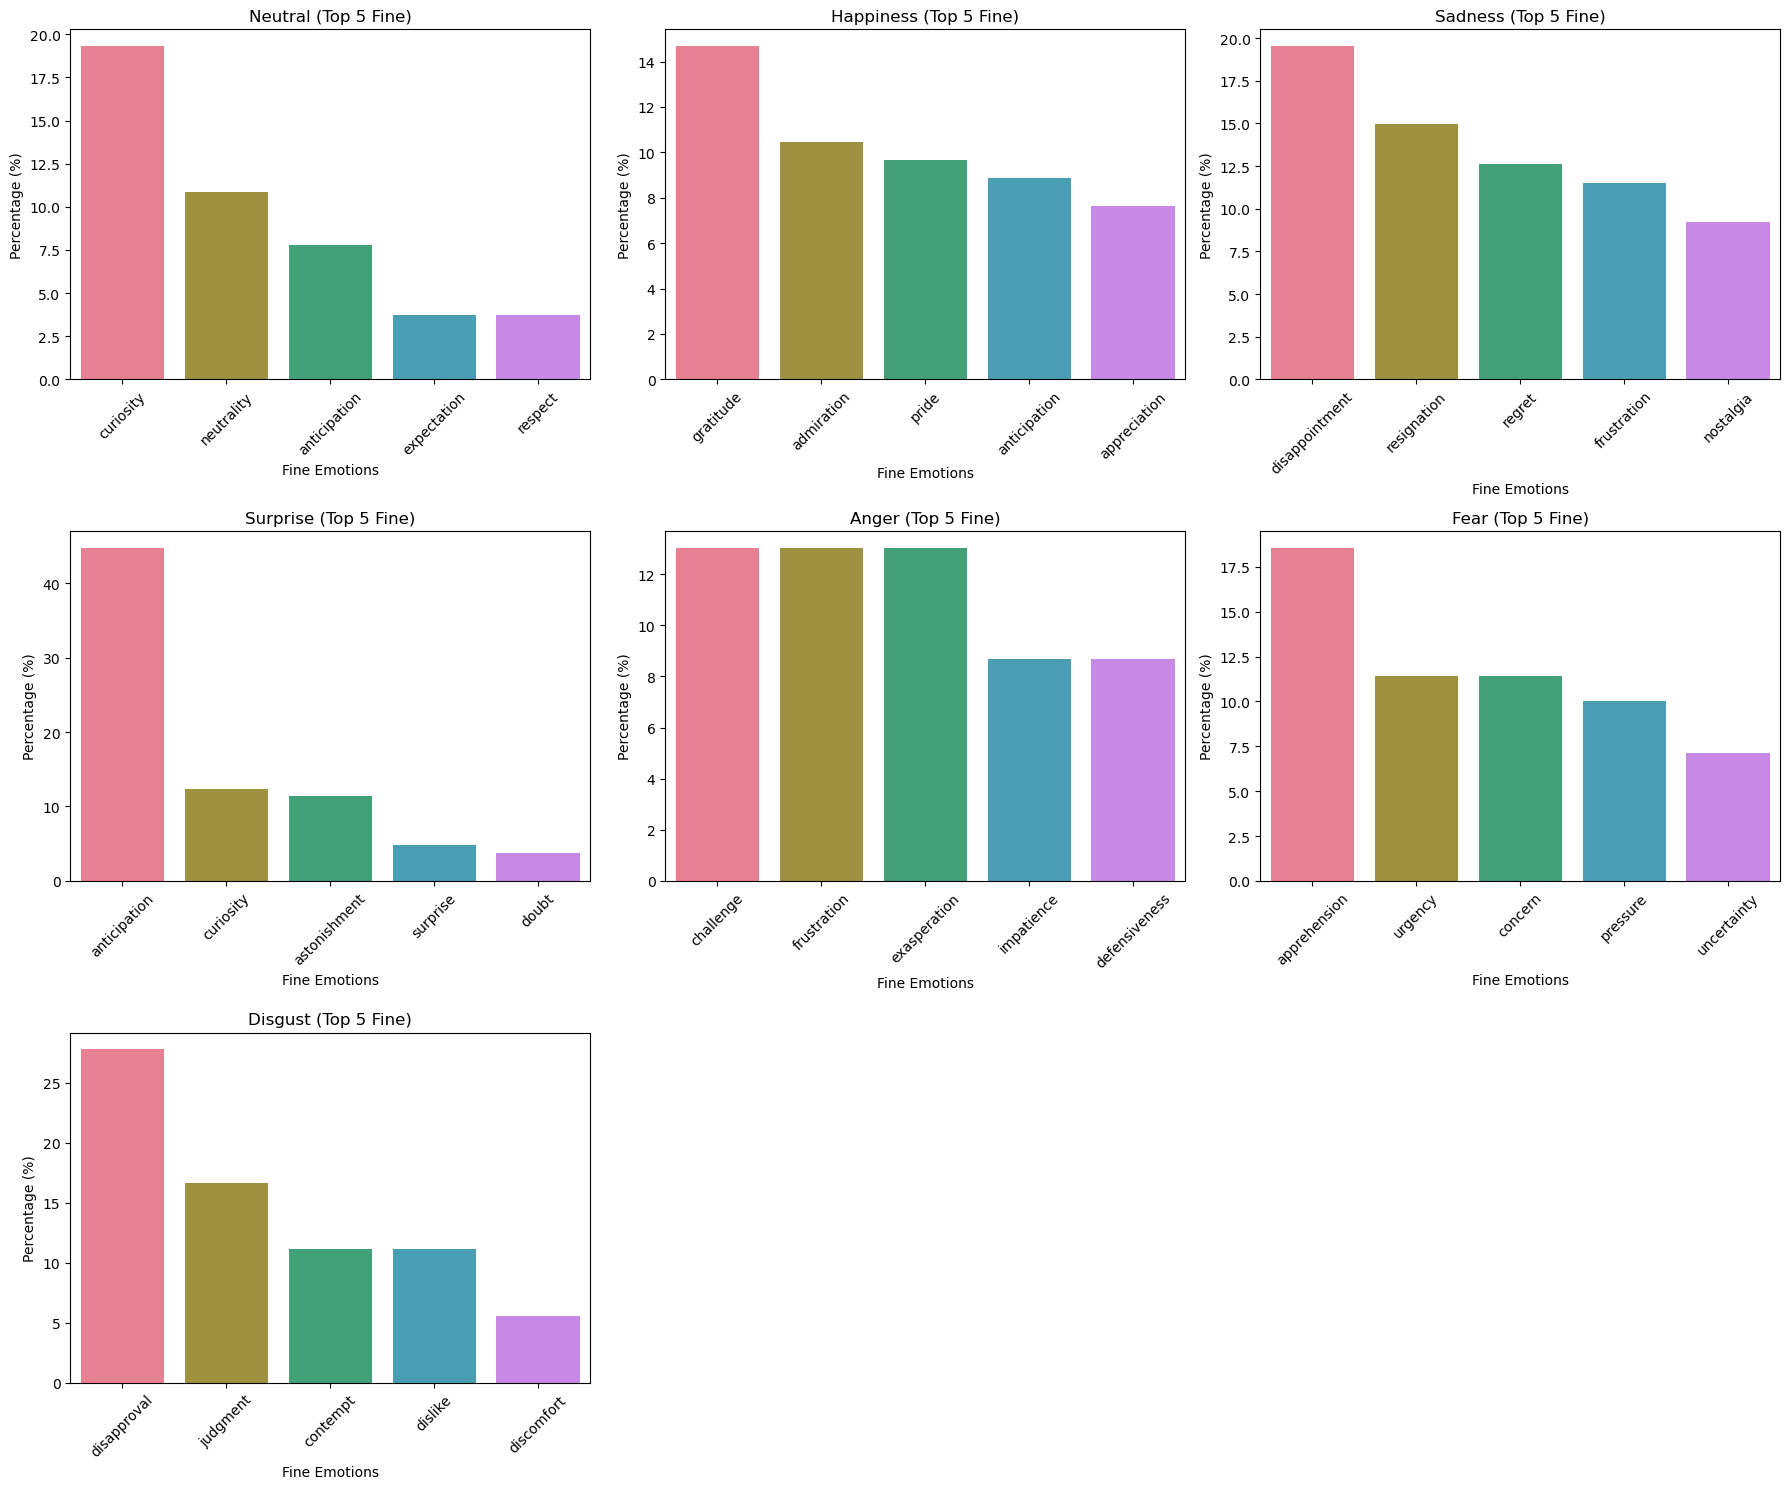

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique core emotions
core_emotions = df['Emotion_core'].unique()

# 3x3 grid for plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

i = 0

# Loop through emotions
for emotion in core_emotions:
    fine_emotions_drilldown = df[df['Emotion_core'] == emotion]['Emotion_fine']
    emotion_percentages = fine_emotions_drilldown.value_counts(normalize=True).head(5) * 100
    
    sns.barplot(
        x=emotion_percentages.index,
        y=emotion_percentages.values,
        hue=emotion_percentages.index,
        palette='husl',
        legend=False,
        ax=axes[i]
    )

    axes[i].set_title(f'{emotion.title()} (Top 5 Fine)')
    axes[i].set_xlabel('Fine Emotions')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].tick_params(axis='x', rotation=45)
    
    i += 1

# Hide any unused subplots
for j in range(i, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In analyzing the Emotions_fine, we found that the classes were not that imbalanced. There was a wide variety of emotions. Additionally, in our project we will be focusing on the core emotions, so extended analysis is not needed here. However, we created a drill down of emotions that were labeled under the Emotions_Core and found anticipation fits into happiness, surprise, and neutral. 

Anticipation should be shown, however these emotions in this data show the nuances of the data. There is a lot of stress and anticipation around contestants. These emotions can be very difficult to derive explicit meaning through definitions. To battle this, it is important that we train on stressful data where there can be mixes of emotions.

## Systematic Gaps

In [43]:
sentence_lengths = []
word_counts = []

# Loop through each sentence
for sentence in df['Sentence']:
    s = str(sentence)
    
    # Count characters and words
    sentence_lengths.append(len(s))
    word_counts.append(len(s.split()))

df['sentence_length'] = sentence_lengths
df['word_count'] = word_counts

# Overall statistics
print("Length statistics:")
print(df['sentence_length'].describe())

print("\nWord count statistics:")
print(df['word_count'].describe())

# Check for very short and very long sentences
short_sentences = 0
long_sentences = 0

for count in df['word_count']:
    if count < 5:
        short_sentences += 1
    elif count > 10:
        long_sentences += 1

print(f"\nVery short sentences (<5 words): {short_sentences}")
print(f"Very long sentences (>10 words): {long_sentences}")


Length statistics:
count    1095.000000
mean       30.634703
std        15.307031
min         3.000000
25%        18.000000
50%        30.000000
75%        42.000000
max        74.000000
Name: sentence_length, dtype: float64

Word count statistics:
count    1095.000000
mean        5.880365
std         3.038348
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        15.000000
Name: word_count, dtype: float64

Very short sentences (<5 words): 403
Very long sentences (>10 words): 77


The dataset contains very short sentences. More than 80% of the sentences have less than five words. This could lead to the imbalanced classes because it is more difficult to express complex emotions in short sentences. This could be an indicator of why there are large imbalances when it comes to Emotion_core.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sentence_lengths = []

for sentence in df['Sentence']:
    sentence_lengths.append(len(str(sentence).split()))

df['sentence_length'] = sentence_lengths

length_by_emotion = df.groupby('Emotion_core')['sentence_length'].agg(['count', 'mean', 'median']).round(2)

print("Sentence Length by Emotion:")
print(length_by_emotion)

Sentence Length by Emotion:
              count  mean  median
Emotion_core                     
anger            23  6.91     7.0
disgust          18  7.39     8.0
fear             70  6.89     7.0
happiness       497  5.75     5.0
neutral         295  5.62     5.0
sadness          87  7.13     7.0
surprise        105  5.05     5.0


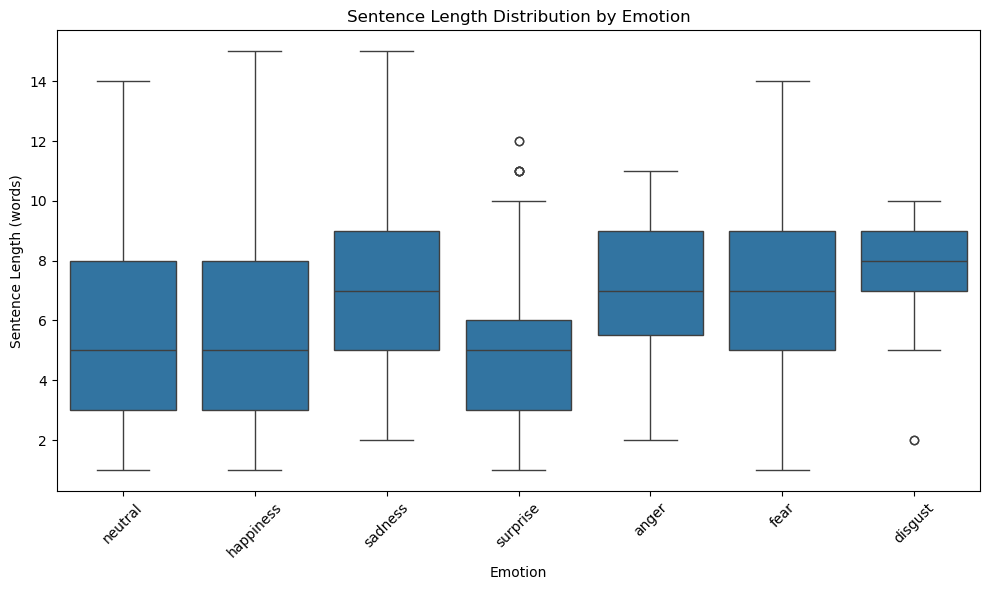

In [45]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Emotion_core', y='sentence_length')
plt.title('Sentence Length Distribution by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Sentence Length (words)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is correlation between sentence length and complexity of emotion. The shorter sentences which are more prevalent in this dataset belong to the sentiments of neutral, happiness, and surprise (the more prevalent emotions). It is important that we train data that has both varying sentence length and emotional distribution.

## **5. Reflection for Training Data Selection**

In order to gather the best information to achieve the best results in this text set it is important to train data that has strong performance in happy and neutral classification, informal language and stressful situations. The dataset should be very large too so the model can learn a lot and classify emotions well Additionally, in preparing our data we should focus on classifying short sentences. 

Overall, this test set is a small dataset with some errors, when evaluating we should consider these faults, testing on other sets. Additionally, in order to create a model that is generalizable, we should not focus on these specific data set qualities, but focus on building a data set and model that can be used on any dataset. The dataset should be large and should have a good amount of informal language in it as well.